# EHealth 705

## Python Tutorial: Logistic Regression

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [Overview of basic concepts in Logistic regression.](#regression)
2. [Logistic Regression model in Python](#model)
3. [Exercise: Apply linear regression and Logistic regression to a health data set.](#Practical_exercise)
4. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
5. [Assignment2: CLT](#Assignment)


#### Date : Mar  28th, 2024

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import math
import pingouin as pg
import string
from scipy import stats
# warnings.filterwarnings('ignore')  # This will ignore all warnings

from statsmodels import api as sm
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,  KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# Overview of basic concepts in regression analysis. <a id="regression"></a>

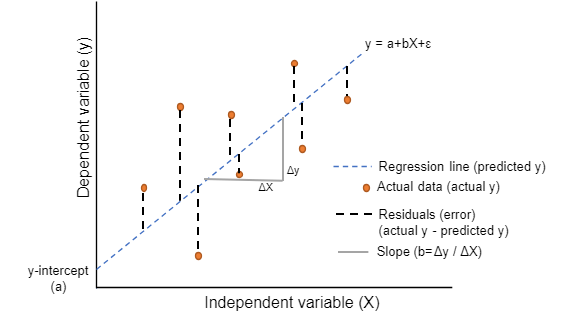


## What is Logistic Regression?

Logistic regression can be used with a single feature of continuous numeric data with a binary target. It predicts the probability (between 0 and 1) that a data point belongs to a particular class or category. This probability can then be used to classify that observation: assigning it to its probable group.

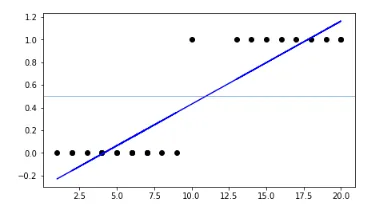


### Logistic Function - Sigmoid Function
- The sigmoid function is a mathematical function used to map the predicted values to probabilities.
- It maps any real value into another value within a range of 0 and 1 . The value of the logistic regression must be between 0 and 1 , which cannot go beyond this limit, so it forms a curve like the " $\mathrm{S}$ " form.
- The S-form curve is called the Sigmoid function or the logistic function.
- In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1 . Such as values above the threshold value tends to 1 , and a value below the threshold values tends to 0 .


$\sigma(z)=\frac{1}{1-e^{-z}}$

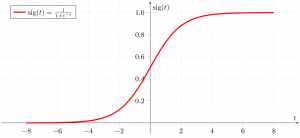





### Decision boundary
The sigmoid function returns a probability value between 0 and 1 . This probability value is then mapped to a discrete class which is either " 0 " or " 1 ". In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-
$$
\begin{aligned}
& p \geq 0.5 \Rightarrow \text { class }=1 \\
& p<0.5 \Rightarrow \text { class }=0
\end{aligned}
$$

Generally, the decision boundary is set to 0.5 . So, if the probability value is $0.8(>0.5)$, we will map this observation to class 1 . Similarly, if the probability value is $0.2(<0.5)$, we will map this observation to class 0 . This is represented in the graph below-

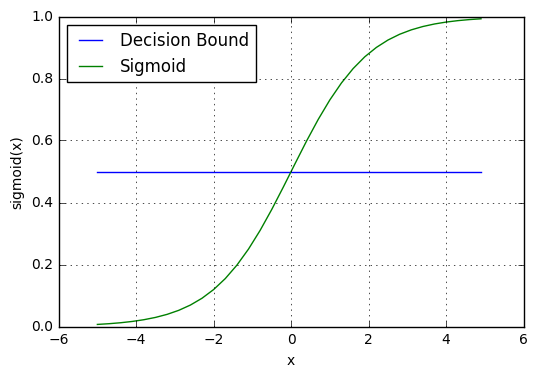

## Types of Logistic Regression
On the basis of the categories, Logistic Regression can be classified into three types:
1. Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1 , Pass or Fail, etc.
2. Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
3. Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".



## Assumptions of Logistic Regression
We will explore the assumptions of logistic regression as understanding these assumptions is important to ensure that we are using appropriate application of the model. The assumption include:
1. Independent observations: Each observation is independent of the other. meaning there is no correlation between any input variables.
2. Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used.
3. Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.
4. No outliers: There should be no outliers in the dataset.
5. Large sample size: The sample size is sufficiently large


## How to Evaluate Logistic Regression Model?
We can evaluate the logistic regression model using the following metrics:
- Accuracy: Accuracy, provides the proportion of correctly classified instances.
$$
\text { Accuracy }=\frac{\text { True Positives }+ \text { True Negatives }}{\text { Total }}
$$
- Precision: Precision focuses on the accuracy of positive predictions.
$$
\text { Precision }=\frac{\text { True Positives }}{\text { True Positives }+ \text { False Positives }}
$$
- Recall (Sensitivity or True Positive Rate): Recall measures the proportion of correctly predicted positive instances among all actual positive instances.
$$
\text { Recall }=\frac{\text { True Positives }}{\text { True Positives }+ \text { False Negatives }}
$$
- F1 Score: F1 score is the harmonic mean of precision and recall.
$$
F 1 \text { Score }=2 * \frac{\text { Precision } * \text { Recall }}{\text { Precision }+ \text { Recall }}
$$


- Area Under the Receiver Operating Characteristic Curve (AUC-ROC): The ROC curve plots the true positive rate against the false positive rate at various thresholds. AUC-ROC measures the area under this curve, providing an aggregate measure of a model's performance across different classification thresholds.
- Area Under the Precision-Recall Curve (AUC-PR): Similar to AUC-ROC, AUCPR measures the area under the precision-recall curve, providing a summary of a model's performance across different precision-recall trade-offs.


$$
\begin{array}{|c|c|}
\hline \text { Linear Regression } & \text { Logistic Regression } \\
\hline \begin{array}{c}
\text { Linear regression is used to } \\
\text { predict the continuous } \\
\text { dependent variable using a } \\
\text { given set of independent } \\
\text { variables. }
\end{array} & \begin{array}{r}
\text { Logistic regression is used } \\
\text { to predict the categorical } \\
\text { dependent variable using a } \\
\text { given set of independent } \\
\text { variables. }
\end{array} \\
\hline \begin{array}{c}
\text { Linear regression is used } \\
\text { for solving regression } \\
\text { problem. }
\end{array} & \begin{array}{c}
\text { It is used for solving } \\
\text { classification problems. }
\end{array} \\
\hline \begin{array}{c}
\text { In this we predict the value } \\
\text { of continuous variables }
\end{array} & \begin{array}{c}
\text { In this we predict values of } \\
\text { categorical variables }
\end{array} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|}
\hline \begin{array}{c}
\text { The output must be } \\
\text { continuous value, such as } \\
\text { price, age, etc. }
\end{array} & \begin{array}{c}
\text { Output must be categorical } \\
\text { value such as } 0 \text { or } 1, \text { Yes or } \\
\text { no, etc. }
\end{array} \\
\begin{array}{c}
\text { It required linear } \\
\text { relationship between } \\
\text { dependent and } \\
\text { independent variables. }
\end{array} & \begin{array}{c}
\text { It not required linear } \\
\text { relationship. }
\end{array} \\
\hline \begin{array}{c}
\text { There may be collinearity } \\
\text { between the independent } \\
\text { variables. }
\end{array} & \begin{array}{c}
\text { There should not be } \\
\text { collinearity between } \\
\text { independent variables. }
\end{array} \\
\hline
\end{array}
$$



### Confusion Matrix:

The confusion matrix is a tabular representation that summarizes the model's predictions against the true labels. It shows the number of true positives, true negatives, false positives, and false negatives. From the confusion matrix, other metrics like accuracy, precision, and recall can be calculated.

### Log Loss (Cross-Entropy Loss):

Log Loss measures the error between predicted probabilities and actual class labels. It is used to evaluate the probabilities output by the Logistic Regression model. A lower log loss indicates better model performance.

In [4]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                        test_size=0.20,
                                        random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)



Logistic Regression model accuracy (in %): 96.49122807017544


C:\Users\Shirin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Generate a synthetic binary classification dataset

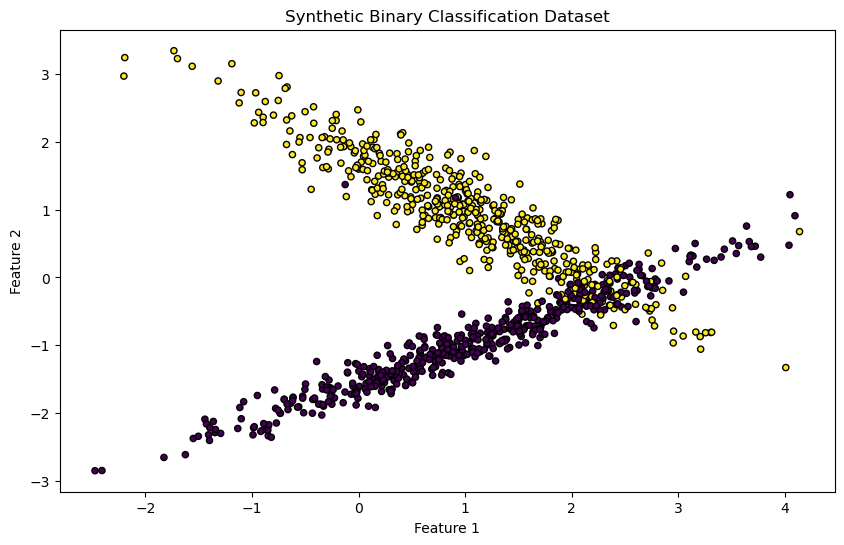

Accuracy: 0.8833333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       147
           1       0.93      0.84      0.88       153

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



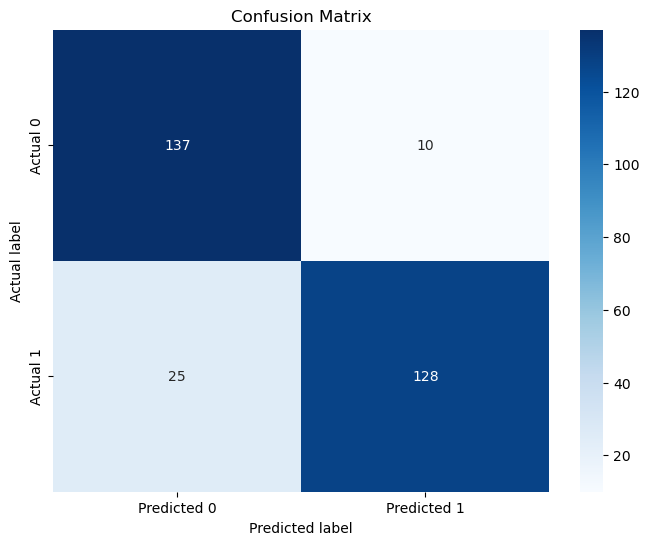

In [6]:


X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, random_state=42, n_clusters_per_class=1, n_redundant=0, n_informative=2)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')  # 'liblinear' solver is chosen for binary classification
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# Regression model in Python <a id="model"></a>



In [7]:
# Load the data
dataset = sm.datasets.modechoice.load_pandas()
# This gets loaded as a ‘Dataset’ object with the actual data being accessible via the 'data' key:
# Extract the data
df = dataset['data']



'''This data frame contains information related to inter-city journeys recorded as 
part of a 1987 Australian study in which travellers chose a mode of transport from four alternatives:
plane, car, bus or train. For this example we will only look at the plane trips:'''


# Decode the data
df['mode'] = df['mode'].replace({1: 'air', 2: 'train', 3: 'bus', 4: 'car'})
# Separate out the data we want
df = df[df['mode'] == 'air'].copy()


# Decode the data
df['choice'] = df['choice'].replace({0: 'no', 1: 'yes'})
# Separate out the data we want
cols = ['invc', 'choice']
df = df[cols]

print(df.head())

     invc choice
0    59.0     no
4    58.0     no
8   115.0     no
12   49.0     no
16   60.0     no


Also, we only want to use one feature and the one target:
- 'invc' will be the feature: the 'in-vehicle cost' for all stages of the journeys. The cost is listed in dollars, which I assume is Australian dollars.
- 'choice' will be the target: binary values - either 'yes' or 'no' - reflecting whether that particular mode of transport was chosen by that participant.

Our goal is to create a model that will predict whether a traveller will chose ‘yes’ when given the option of a plane journey at a particular price.


### Logistic Regression

In [8]:
X = df[['invc']]
y = df['choice']

print(type(X), X.shape)

<class 'pandas.core.frame.DataFrame'> (210, 1)


In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=20230926, test_size=0.3
)

In [11]:
# Create the model
log_regr = linear_model.LogisticRegression()
# Fit the model
log_regr.fit(X_train.values, y_train.values)

LogisticRegression()

In [12]:
# Use the model to make predictions on the training data
log_odds = log_regr.intercept_ + log_regr.coef_ * X_train
# Convert the log-odds into probabilities
probability = np.exp(log_odds) / (1 + np.exp(log_odds))

print(probability.head())

         invc
740  0.196003
92   0.449222
232  0.431005
264  0.383452
88   0.583800


The above code block is using a logit link function:
$$
\operatorname{logit}(p)=\ln \left(\frac{p}{1-p}\right)=b_0+b_1 x_1+b_2 x_2+\ldots b_n x_n
$$

Where $p$ is 'probability' and so $\frac{p}{1-p}$ is 'odds'. Because the logit is equal to the logarithm of odds it is also known as the 'logodds' which is what it was called above.

In [13]:
# Use the model to make binary predictions
X_binary = np.linspace(X.min() * 0.9, X.max() * 1.1, 700).reshape(-1, 1)
y_binary = log_regr.predict(X_binary)
# Use the model to make predictions without the thresholding
X_smooth = np.linspace(X.min() * 0.9, X.max() * 1.1, 100).reshape(-1, 1)
y_smooth = log_regr.predict_proba(X_smooth)[:, 1]

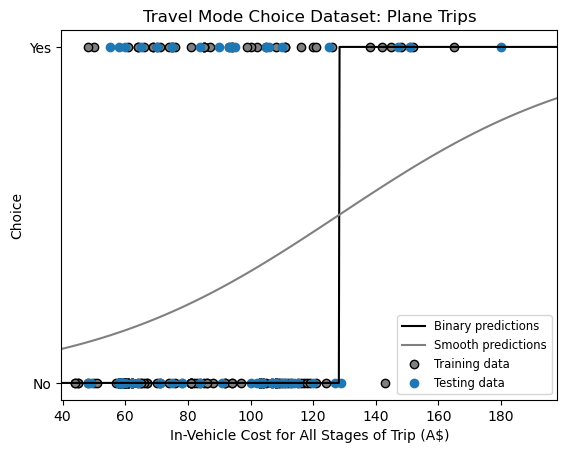

In [14]:
# Plot
plt.plot(X_binary, y_binary, c='k', label='Binary predictions')
plt.plot(X_smooth, y_smooth, c='gray', label='Smooth predictions')
plt.scatter(X_train, y_train, c='gray', ec='k', label='Training data')
plt.scatter(X_test, y_test, c='C0', label='Testing data')
plt.title('Travel Mode Choice Dataset: Plane Trips')
plt.ylabel('Choice')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xlabel('In-Vehicle Cost for All Stages of Trip (A$)')
plt.xlim(X_smooth.min(), X_smooth.max())
plt.legend(loc='lower right', fontsize='small')
plt.show()

This plot might seem counter-intuitive: why is an increase in cost associated with an increase in predicted probability of choosing 'yes'? Surely as the cost of a trip gets larger people will be less likely to choose it? The explanation lies in remembering that the data represents inter-city journeys that travellers could either complete via plane, car, train or bus (with only the data regarding plane trips being used in our model); longer journeys will tend to be more expensive regardless of the mode of transport and if a journey is very long some people will be more likely to choose a plane despite it being expensive. So the data points in the top right of the plot - which represent people choosing to travel via plane at a high cost - probably represent very long (or very urgent) journeys.

### Evaluation

Let's use the testing set to test the model's prediction-making abilities:

In [15]:
# Use the model to make predictions on the test data
y_pred = log_regr.predict(X_test.values)

In [16]:
# Confusion matrix
cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred, labels=['yes', 'no']),
    index=['Actual Yes', 'Actual No'],
    columns=['Predicted Yes', 'Predicted No']
)

print(cm)

            Predicted Yes  Predicted No
Actual Yes              4            15
Actual No               1            43


Hmm, this doesn't look so good: we have more false negatives (trips that were incorrectly predicted to not be chosen) than true positives (trips that were correctly predicted to be chosen). This is a sign that this model - a logistic regression using only one feature - might not be right for this data. Anyway, let's continue evaluating it by calculating its accuracy, precision, recall and F1 score using the number of true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN):
$$
\text { Accuracy }=\frac{T P+T N}{T P+F P+T N+F N}
$$


$$\text { Precision }=\frac{T P}{T P+F P}$$

$$
\text { Recall }=\frac{T P}{T P+F N}
$$

$$F 1=2 * \frac{\text { Precision } * \text { Recall }}{\text { Precision }+ \text { Recall }}$$


In [17]:
acc = metrics.accuracy_score(y_test, y_pred)

print(acc)



prec = metrics.precision_score(y_test, y_pred, pos_label='yes')

print(prec)


rec = metrics.recall_score(y_test, y_pred, pos_label='yes')

print(rec)



f1 = metrics.f1_score(y_test, y_pred, pos_label='yes')

print(f1)

0.746031746031746
0.8
0.21052631578947367
0.3333333333333333


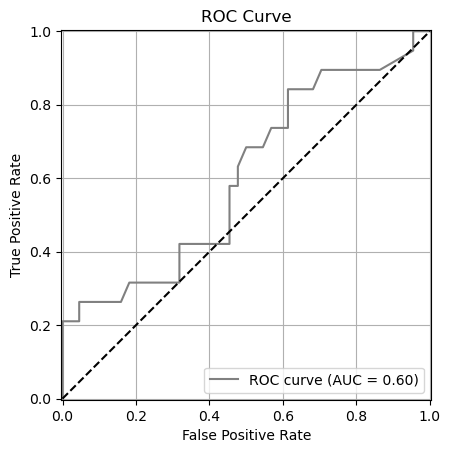

In [18]:
# ROC curve
ax = plt.axes()
y_pred_prob = log_regr.predict_proba(X_test.values)
y_score = y_pred_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label='yes')
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
ax.plot(
    fpr, tpr, color='grey',
    label=f'ROC curve (AUC = {roc_auc:.2f})'
)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.set_aspect('equal', 'box')
ax.set_xlim(-0.003, 1.003)
ax.set_ylim(-0.003, 1.003)
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Exercise: Apply linear regression and Logistic regression to a health data set. <a id="Practical_exercise"></a>


In [69]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.duplicated().sum()

1

In [72]:
df = df.drop_duplicates()
df.duplicated().sum()
df2 = df.copy()

In [66]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [67]:
le = LabelEncoder()
for col in cat_cols: 
    df[col] = le.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
X = df.drop('charges', axis=1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1069, 6), (1069,), (268, 6), (268,))

In [38]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

In [39]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 35493102.61165054
R² Score: 0.8068466322629111


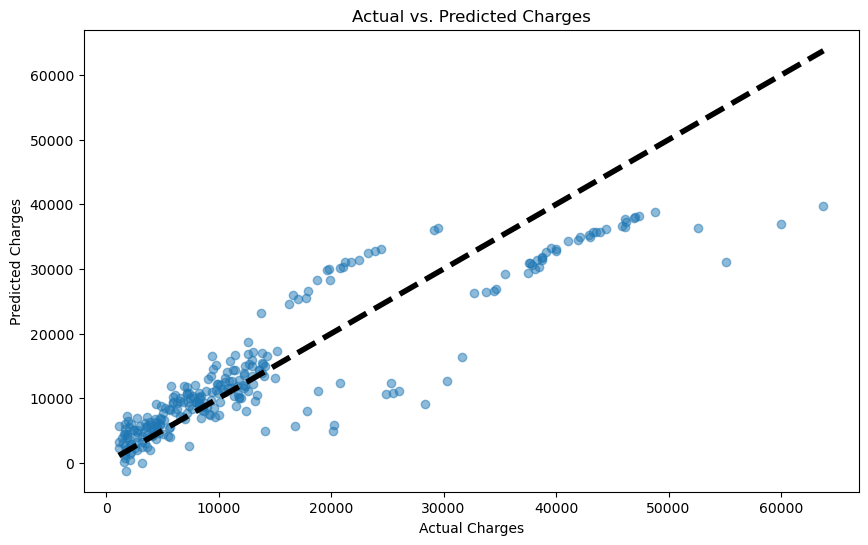

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


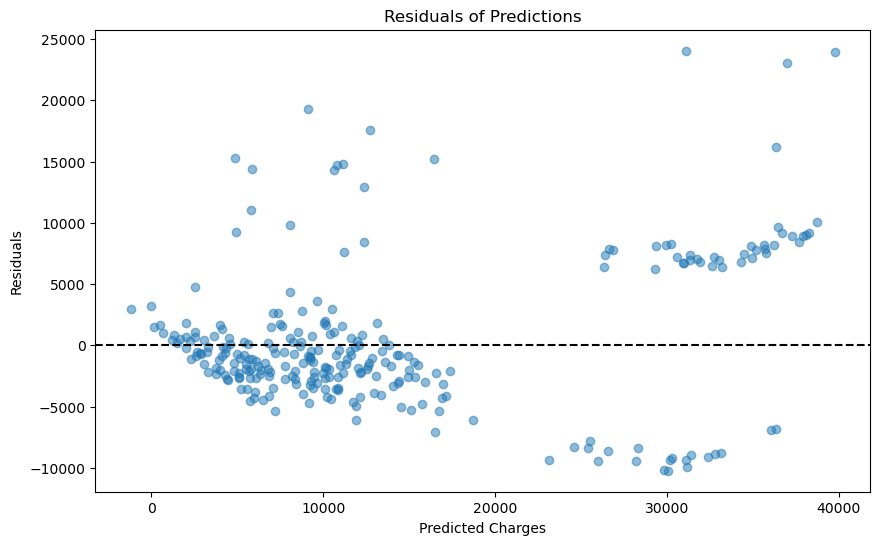

In [44]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


## Logistic Regression

Accuracy: 0.9664179104477612
Confusion Matrix:
[[202   6]
 [  3  57]]


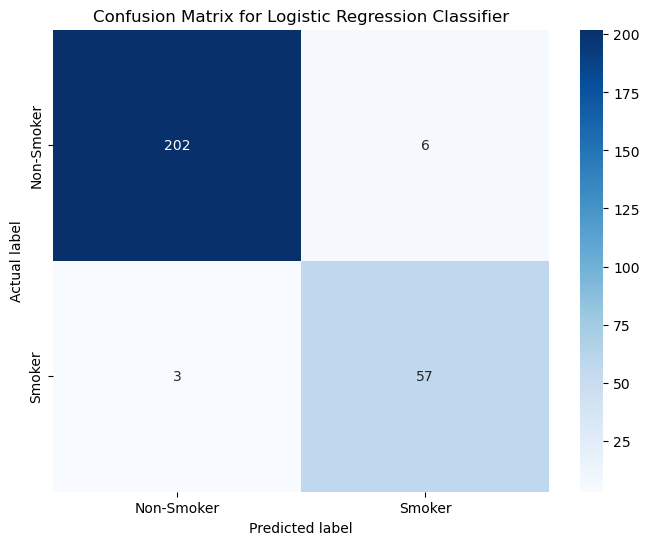

In [73]:
encoder = LabelEncoder()
df2['sex'] = encoder.fit_transform(df2['sex'])
df2['region'] = encoder.fit_transform(df2['region'])
df2['smoker'] = encoder.fit_transform(df2['smoker'])

# Separating features and target
X = df2.drop('smoker', axis=1)
y = df2['smoker']

# Scaling the features since charges may have a larger scale compared to others
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [83]:
df = pd.read_csv("./insurance.csv")
# Convert 'smoker' column to numerical using LabelEncoder
encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])

# Discretize 'age' into bins and create a new column for age bins
age_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['age_bin'] = age_discretizer.fit_transform(df[['age']])

# Convert 'charges' into binary outcome: 0 for costs below the median, 1 for above
median_charges = df['charges'].median()
df['high_cost'] = (df['charges'] > median_charges).astype(int)

# Select features for logistic regression
X = df[['smoker', 'age_bin']]
y = df['high_cost']

In [84]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9253731343283582


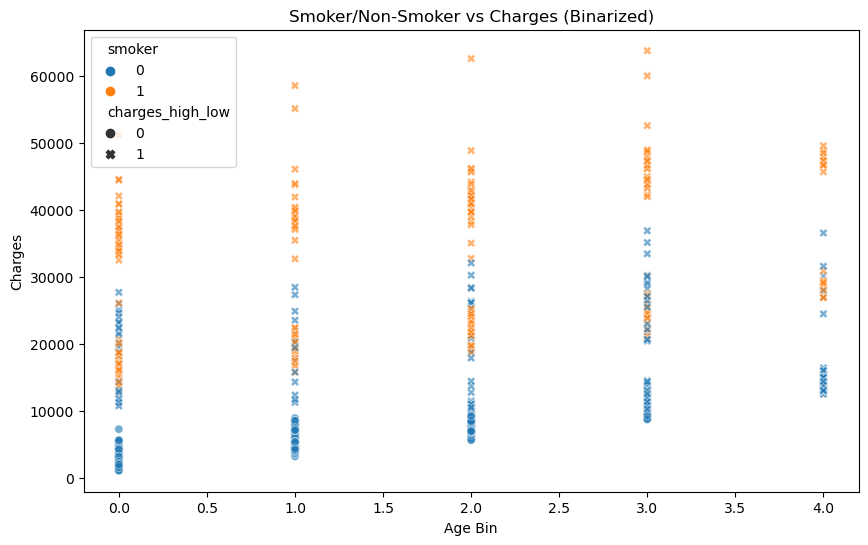

In [91]:

df = pd.read_csv("./insurance.csv")
# Binarize the 'charges' column based on a threshold, e.g., the median value
threshold = df['charges'].median()
df['charges_high_low'] = (df['charges'] > threshold).astype(int)
# Check for NaN values in 'age' and handle them
if df['age'].isnull().any():
    df = df.dropna(subset=['age'])  # or df['age'].fillna(df['age'].median(), inplace=True)

# Bin the 'age' column into discrete intervals
df['age_bin'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=False, include_lowest=True)

# Check if 'age_bin' contains NaN after binning (it shouldn't if all 'age' data is within bin ranges)
if df['age_bin'].isnull().any():
    raise ValueError("NaN values found in 'age_bin' after binning. Adjust bin ranges to include all 'age' values.")

# Remove rows with missing values
df = df.dropna(subset=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

# Convert 'smoker' to a binary integer column
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Define features and target
X = df[['smoker', 'age_bin']]
y = df['charges_high_low']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Plotting smoker or not vs charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_bin', y='charges', hue='smoker', style=y, markers=['o', 'X'], alpha=0.6)
plt.xlabel('Age Bin')
plt.ylabel('Charges')
plt.title('Smoker/Non-Smoker vs Charges (Binarized)')
plt.show()



C:\Users\Shirin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


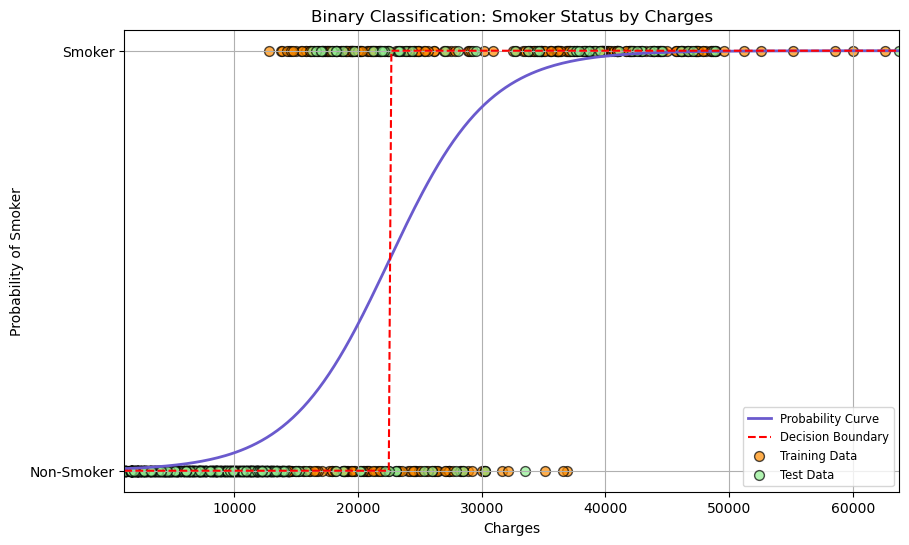

In [94]:
df = pd.read_csv("./insurance.csv")


# Encode 'smoker' as a binary variable
encoder = LabelEncoder()
df['smoker_binary'] = encoder.fit_transform(df['smoker'])

# Define features and target
X = df[['charges']]  # Continuous feature
y = df['smoker_binary']  # Binary target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate a smooth curve of predicted probabilities
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Make sure it's a 2D array for sklearn
y_smooth = model.predict_proba(X_smooth)[:, 1]  # Predicted probabilities for being a smoker

# Binary predictions (for the plot, although logistic regression isn't usually for binary outcomes)
y_binary = (y_smooth > 0.5).astype(int)

# Plot
plt.figure(figsize=(10, 6))
# Smooth prediction curve
plt.plot(X_smooth, y_smooth, c='slateblue', label='Probability Curve', lw=2)
# Binary decision boundary
plt.plot(X_smooth, y_binary, 'r--', label='Decision Boundary')
# Scatter plot for training data
plt.scatter(X_train, y_train, c='darkorange', edgecolors='k', s=50, label='Training Data', alpha=0.7)
# Scatter plot for test data
plt.scatter(X_test, y_test, c='lightgreen', edgecolors='k', s=50, label='Test Data', alpha=0.7)
# Customize plot
plt.title('Binary Classification: Smoker Status by Charges')
plt.ylabel('Probability of Smoker')
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.xlabel('Charges')
plt.xlim(X_smooth.min(), X_smooth.max())
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

#### Practical Exercise Solutions and Insights

- **Exploring Logistic Regression**:
  - [Scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [Logistic Regression Overview](https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.)
  - [Detailed Overview of Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
  - [Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)
  - [Logistic Regression Simplified](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)
  - [A Step-by-Step Explanation of Logistic Regression](https://medium.com/@satyarepala/understanding-logistic-regression-a-step-by-step-explanation-9a404344964b)
  - [Building a Logistic Regression in Python](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
  - [Logistic Regression in Python](https://medium.datadriveninvestor.com/logistic-regression-in-python-423c8d32838b)
  - [Health Insurance Lead Prediction](https://www.kaggle.com/code/sureshmecad/health-insurance-lead)
  - [Predicting Healthcare Insurance Costs Using ML](https://www.kaggle.com/code/yaminh/predicting-healthcare-insurance-costs-using-ml)
  - [Logistic Regression Classifier Tutorial](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)
  - [Logistic Regression Implementation](https://www.kaggle.com/code/kanncaa1/logistic-regression-implementation)
  - [Alice Logistic Regression Baseline](https://www.kaggle.com/code/kashnitsky/alice-logistic-regression-baseline)
  - [Predicting Medical Charges Using Linear Regression](https://www.kaggle.com/code/sarahmashhood/predicting-medical-charges-using-linear-regression)
  - [Insurance Data Modeling: Linear Regression](https://www.kaggle.com/code/galalqassas/insurance-data-modeling-linear-regression)
  - [US Health Insurance Dataset Analysis](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/code)
  - [Regression Modelling Using Insurance Dataset](https://www.kaggle.com/code/maverickss26/regression-modellng-using-insurance-dataset)
  - [Health Insurance Dataset Exploration](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)
  - [Bayesian Approaches in Python](https://ethanweed.github.io/pythonbook/06.01-bayes.html)
  - [Logistic Regression in Python](https://rowannicholls.github.io/python/machine_learning/supervised_models/logistic_regression.html)

#### Datasets for Practice

- **Datasets for Linear Regression Exercises**:
  - [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)
  - [US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/code)


# Assignment <a id="Assignment"></a>

In [54]:
data = pd.read_csv('older_women_health_data.csv')

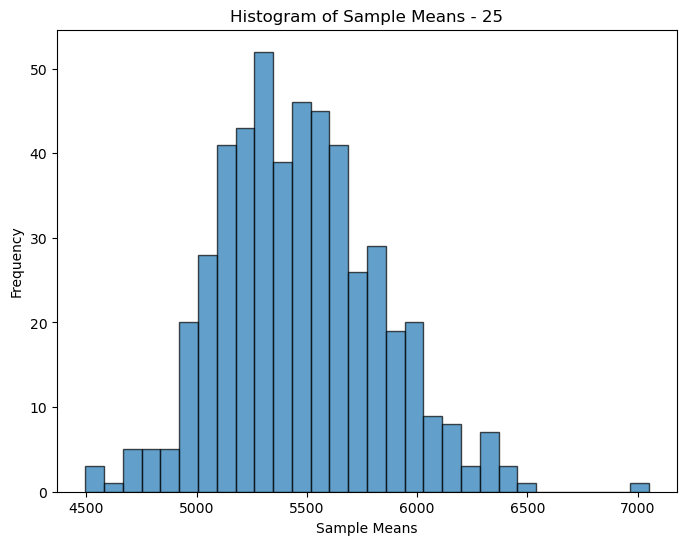

Summary Statistics for Sample_Means_Size_25:
       Sample Means
count    500.000000
mean    5468.218879
std      360.008553
min     4494.964000
25%     5214.684700
50%     5454.166800
75%     5688.943200
max     7051.152400


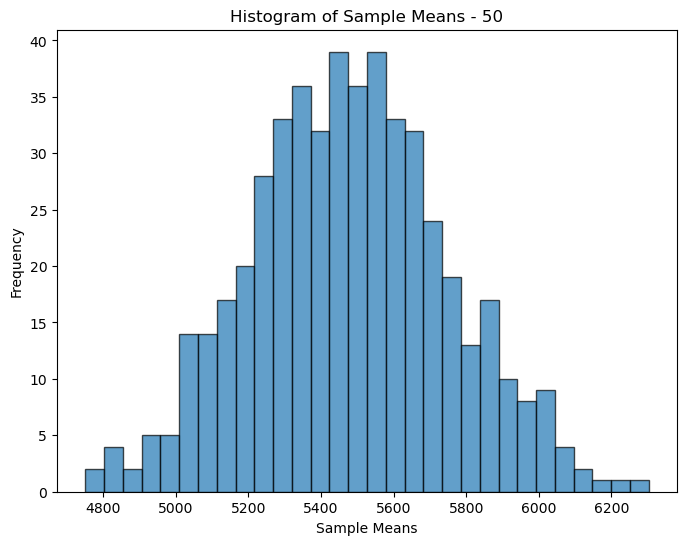

Summary Statistics for Sample_Means_Size_50:
       Sample Means
count    500.000000
mean    5476.962754
std      272.661729
min     4750.313000
25%     5292.861050
50%     5473.118800
75%     5655.146750
max     6302.959000


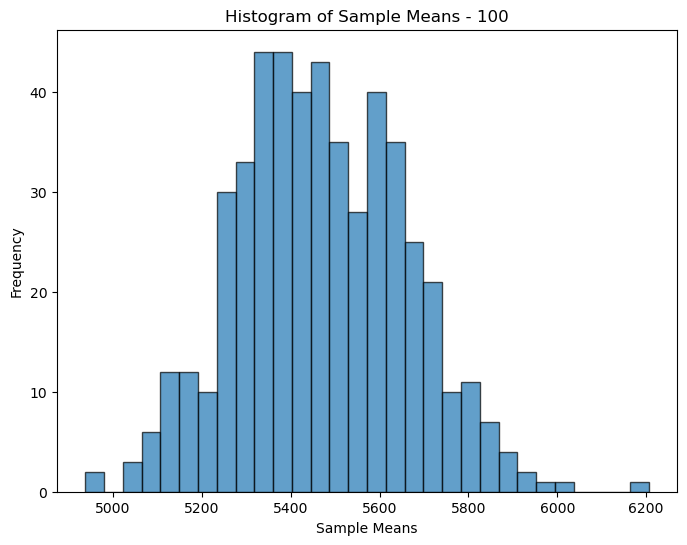

Summary Statistics for Sample_Means_Size_100:
       Sample Means
count    500.000000
mean    5470.054804
std      190.688007
min     4937.452700
25%     5335.713600
50%     5459.356850
75%     5609.017825
max     6206.156100


In [48]:
np.random.seed(23) #Selecting random.seed() to ensure reproducibility  

#Set number of samples. Create sample size list to loop between each number for simplicity. 
num_samples = 500
sample_sizes = [25, 50, 100]

# Initialize dictionary to store sample means data frames
sample_means_dfs = {}

# Generate sample means distributions for each sample size from the 'sample_sizes' list using a loop
for sample_size in sample_sizes:
    # Initialize list to store sample means
    sample_means = []
    
    # Generate 500 samples of the specified size using random.choice() from the 'HealEx20' category and calculate the mean for each sample
    for i in range(num_samples):
        sample = np.random.choice(hth['HealEx20'], size=sample_size, replace=False)
        #Append mean to list of sample means for easier access and reference
        sample_means.append(np.mean(sample))
    
    # Convert list of sample means into a data frame and name it properly
    df_name = f'Sample_Means_Size_{sample_size}'
    sample_means_df = pd.DataFrame(sample_means, columns=['Sample Means'])
    sample_means_df.name = df_name
    
    # Save data frame to dictionary
    sample_means_dfs[df_name] = sample_means_df
    
    # Plot histogram, set axes and titles
    plt.figure(figsize=(8, 6))
    plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Sample Means - {sample_size}')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.show()
    
    # Run summary statistics
    print(f"Summary Statistics for {df_name}:")
    print(sample_means_df.describe(include='all'))

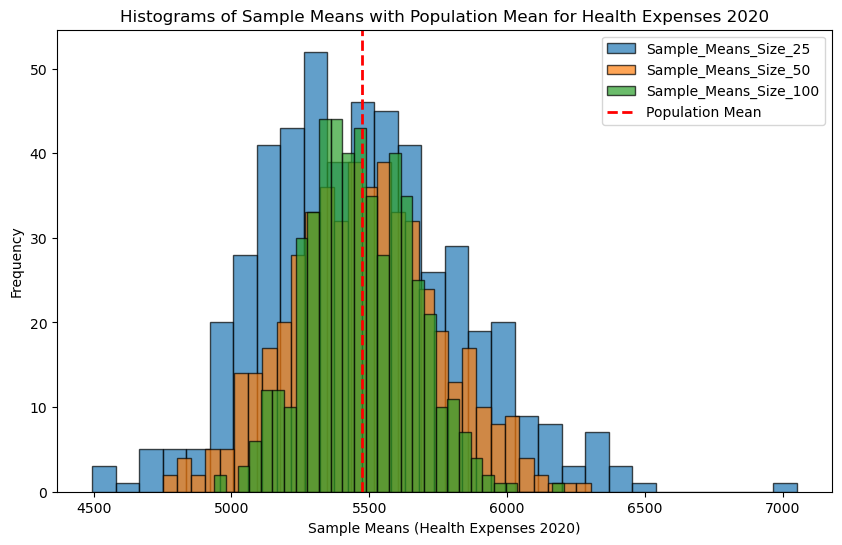

In [50]:
#Selecting same random.seed() to ensure same sampling data
np.random.seed(23)

#Population mean is defined from the original dataframe 
population_mean = hth['HealEx20'].mean()

# Plot histograms for each sample size 
plt.figure(figsize=(10, 6))

#Loop between the different sample sizes as defined in the list from the previous task
for df_name, df in sample_means_dfs.items():
    plt.hist(df['Sample Means'], bins=30, edgecolor='black', alpha=0.7, label=df_name)
    
# Plot vertical line for population mean
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')

#Set titles
plt.title('Histograms of Sample Means with Population Mean for Health Expenses 2020')
plt.xlabel('Sample Means (Health Expenses 2020)')
plt.ylabel('Frequency')
plt.legend()


In [56]:
samples_expenses = {}
sample_sizes = [25, 50, 100]
for size in sample_sizes:
    samples_expenses[size] = np.random.choice(data["HealEx20"], size = size, replace = False)

The 95% CI for the sample with a size of 25 is 4951.07 to 6430.31. The width of the CI is 1479.24.
The 95% CI for the sample with a size of 50 is 4846.15 to 5892.13. The width of the CI is 1045.98.
The 95% CI for the sample with a size of 100 is 5091.23 to 5830.85. The width of the CI is 739.62.


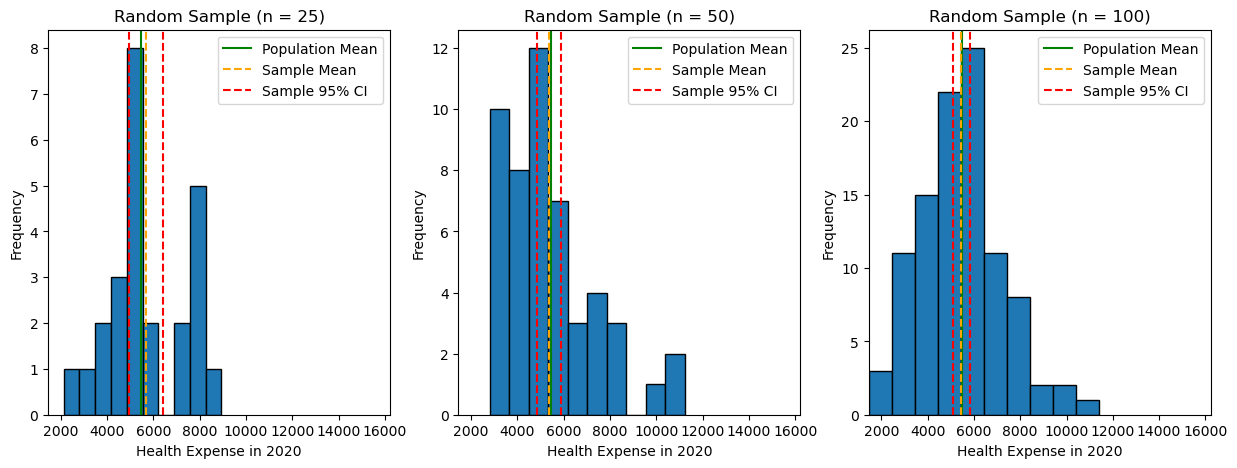

In [59]:
cis = {}

plt.figure(figsize= (15,5))
counter = 1
for size in samples_expenses:
    mean = np.mean(samples_expenses[size])
    cis[size] = 1.96 * np.std(data["HealEx20"]) / np.sqrt(size)
    print (f"The 95% CI for the sample with a size of {size} is {mean - cis[size] :.2f} to {mean + cis[size] :.2f}. The width of the CI is {cis[size] * 2 :.2f}.")
    
    plt.subplot(1, 3, counter)
    plt.hist(samples_expenses[size], edgecolor='black')
    plt.title(f"Random Sample (n = {size})")
    plt.ylabel('Frequency')
    plt.xlabel('Health Expense in 2020')
    
    plt.axvline(np.mean(data["HealEx20"]), color='green', linestyle='solid', label='Population Mean')
    plt.axvline(mean, color='orange', linestyle='dashed', label='Sample Mean')
    plt.axvline(mean - cis[size], color='red', linestyle='dashed', label='Sample 95% CI')
    plt.axvline(mean + cis[size], color='red', linestyle='dashed' )
    plt.legend()
    
    plt.xlim(data["HealEx20"].min(), data["HealEx20"].max())
    counter += 1
  
plt.show()

The 95% CI for the sample with a size of 25 is 4985.09 to 6396.29. The width of the CI is 1411.20.
The 95% CI for the sample with a size of 50 is 4797.11 to 5941.18. The width of the CI is 1144.07.
The 95% CI for the sample with a size of 100 is 5115.32 to 5806.77. The width of the CI is 691.45.


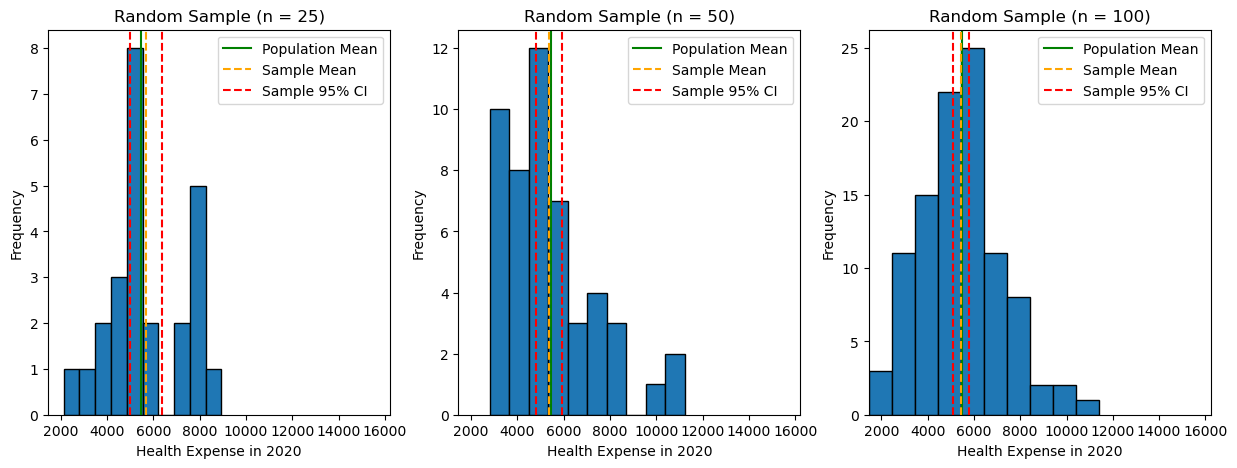

In [62]:
cis = {}
plt.figure(figsize= (15,5))
counter = 1

for size in samples_expenses:
    mean = np.mean(samples_expenses[size])
    cis[size] = stats.t.interval(0.95,
                 df = size - 1,
                 loc = np.mean(samples_expenses[size]), 
                 scale= np.std(samples_expenses[size]) / np.sqrt(size))
    
    print (f"The 95% CI for the sample with a size of {size} is {cis[size][0] :.2f} to {cis[size][1] :.2f}. The width of the CI is {(cis[size][1] - cis[size][0]) :.2f}.")
    
    plt.subplot(1, 3, counter)
    plt.hist(samples_expenses[size], edgecolor='black')
    plt.title(f"Random Sample (n = {size})")
    plt.ylabel('Frequency')
    plt.xlabel('Health Expense in 2020')
    
    plt.axvline(np.mean(data["HealEx20"]), color='green', linestyle='solid', label='Population Mean')
    plt.axvline(mean, color='orange', linestyle='dashed', label='Sample Mean')
    plt.axvline(cis[size][0], color='red', linestyle='dashed', label='Sample 95% CI')
    plt.axvline(cis[size][1], color='red', linestyle='dashed')
    plt.legend()
    plt.xlim(data["HealEx20"].min(), data["HealEx20"].max())
    
    counter += 1
        
plt.legend()
plt.show()

Conclusion: The point of this question was to take a new sample 20,100,500 and compare the mean and std with the one from CLT ( CLT_mean = sample_mean; CLT_std/ n = sample_std), sample size increase confidence interval decrease; also std known we have smaller confidence intervals compare to unknown std.
